Natural Language Processing Group Project - Group 11

Note that most of the new code for this Group project is within the "app.py" Python file which we use to deploy our Flask website and also to interact with Postman.

Q1

We explore various servers to find the best server for our model. One of the servers we looked at is PyTorch using Tensor Server which replaces all the infrastructure. It gives you the ability to set your model for local usage and it is a multi-model server. However, as it must coexist with traditional web servers, it adds significant complexity. Another server we looked at is Tensor flow which is easy and fast to develop. It can server multiple models or multiple versions of the same model at the same time. However, to maintain the growth of the model and to update the model is very difficult. In addition, we can also implement gunicorn which provides http server which is a web application. Then to be able to make this available we can use Nginx which makes it available to external world. However, Nginx has less community support and less extensive list of modules. Lastly, we researched about Flask and decided to use Flask to serve our model because our main programming language is python and Flask is used in python and easy to start. It has higher framework performance and easier to use for simple cases. It also has smaller size of the code base [1]. Flask will keep the domain URL the same, and we will just need to connect a new link. API gateway is responsible for to direct the traffic or routing the request from client to the server. For example, if we put the request to the server using authentication server or ssl, the API gateway divert the traffic to its designated service. If we remove the gateway the user will have direct access to the frontend page. API gateway works as a security and enhances the traffic flow. It also helps to redirect the request. One popular application to testing API is postman which can help simplify working with API. It is an application for testing APIs, by sending request to the web server and getting the response back. [2]

Reference:

[1] STX Next, python powerhouse, “Flask vs. Django: Which python framework is better for your web development?”

[2] Khusboo Kotecha, aubergine solution, “API Testing using Postman”, 2018

Q2


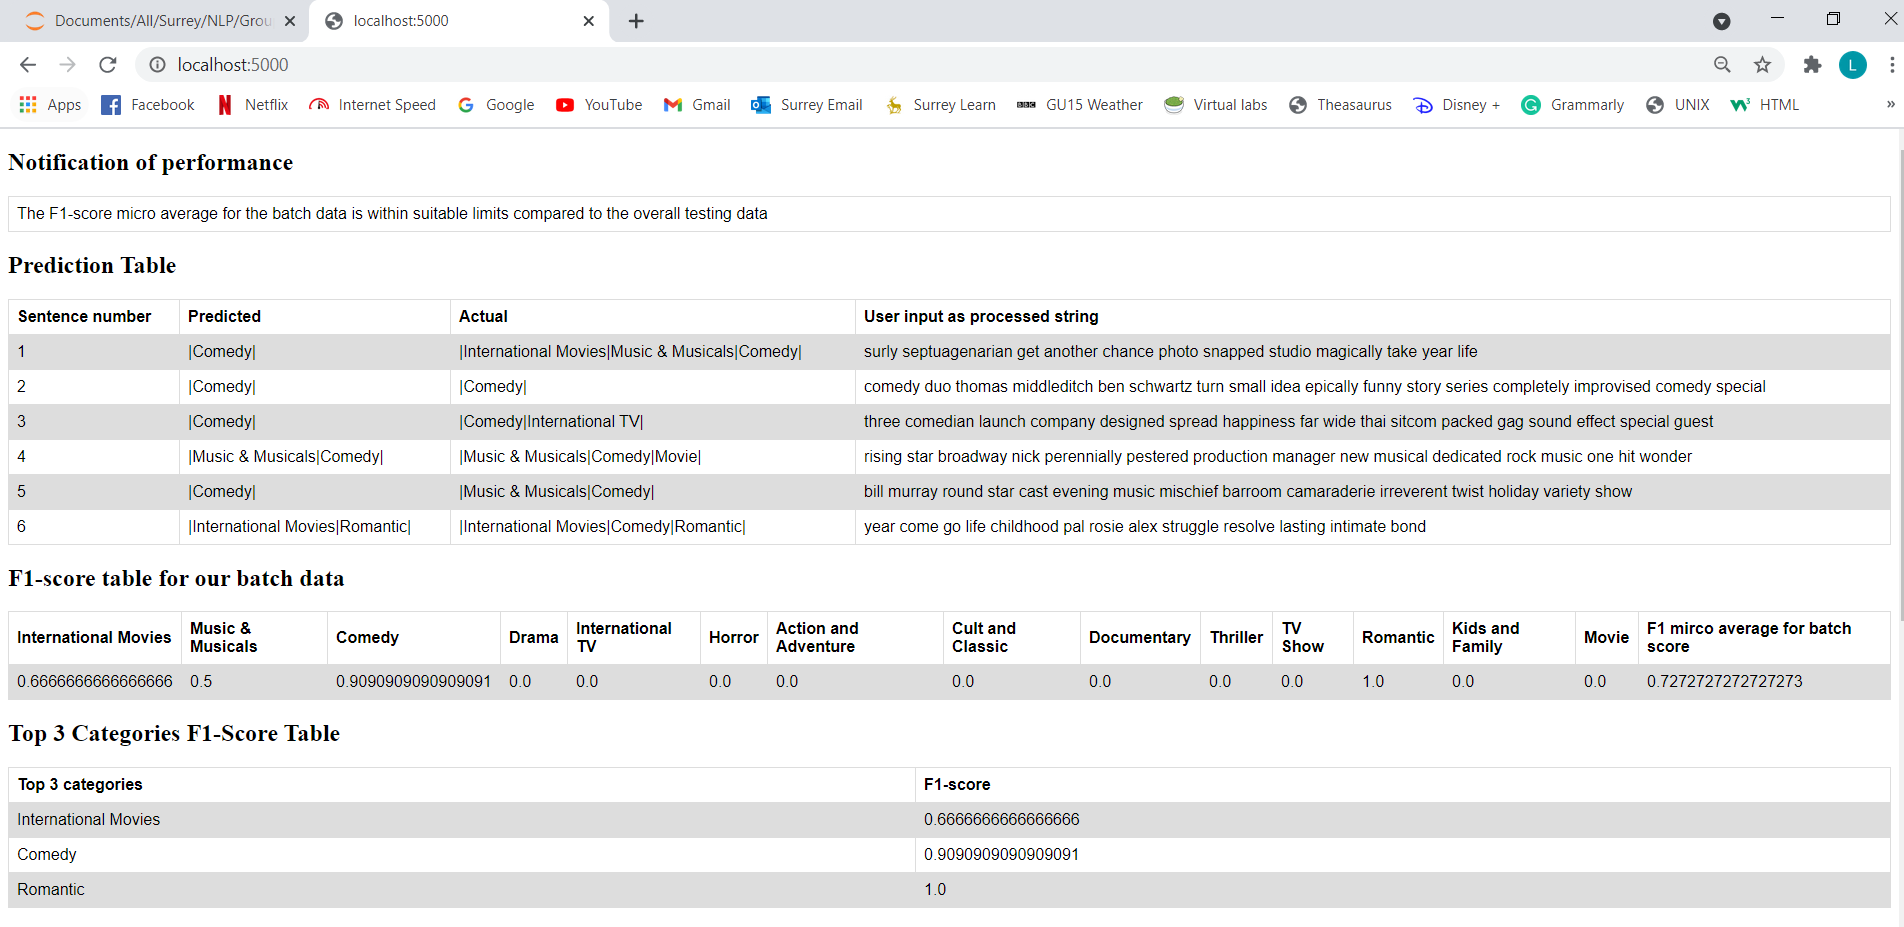

In [26]:
#note that the images below only seem to show consistently when we run each cell at, doing "restart and run all" may not diplay the images
#also a clear image can be seen within the "images" folder

#the code below contains modified code from the source:
#https://stackoverflow.com/questions/10628262/inserting-image-into-ipython-notebook-markdown

from IPython.display import Image
Image(filename='images/Comedy2.png')

For testing we use sentences in the "TestData" Excel file which represent all the testing data available from our model. This Excel file is generated automatically after we run the "model.py" file.

We test our deployed model on Flask where the user inputs a query on our home page. I've designed the input commands in which the user seperates each of the sentences using three slashes being "///".

For example above I use 6 sentences and each of the sentences I use contain the category "Comedy" within their actual labels. The input for the search tool on the homepage I use is:
"surly septuagenarian get another chance photo snapped studio magically take year life///comedy duo thomas middleditch ben schwartz turn small idea epically funny story series completely improvised comedy special///three comedian launch company designed spread happiness far wide thai sitcom packed gag sound effect special guest///rising star broadway nick perennially pestered production manager new musical dedicated rock music one hit wonder///bill murray round star cast evening music mischief barroom camaraderie irreverent twist holiday variety show///year come go life childhood pal rosie alex struggle resolve lasting intimate bond"

In total our output page produces 4 tables and a chart but here we'll just explain the first 3 tables. The first table contains rows where each row represents a individual inputed sentence by the user. We number each sentence and show the processed version of that sentence for each row. We also display the actual and predicted categories for that particular sentence. We see see that the Category comedy is predicted quite accuractely for each sentence, with sentence 6 being the only sentence not being able to predict the "Category" label.

The 14 columns of our second table looks at the F1-scores for each of our categories. We see here that most of our values are 0, since not all categories are considered within our actual and predicted labels from the first table. We see that "Comedy" has a very high F1-score, since as mentioned in table 1 it is able to predict this category rather accurately. "International Movies" has a relatively high F1-score and "Romantic" has a F1-score of 1 since it only shows up for sentence 6 and here it is predicted accurately. We also show the F1-score micro average of all the categories within our batch. This is resembly high having a value which is a lot higher compared to the overall testing data. 

The third table shows the top 3 highest F1-scores of scores mentioned before.

The fourth table not shown as it's cut off the page from one screenshot just shows the F1-scores for each category for the overall test data.

Q3

Q4

As just shown, to test our model functionality, we performed testing on three batch datasets for each of these three categories: “Comedy”, “International Movies” and “Drama”.

The f1-score of the overall testing data for comedy was 0.54, whereas, the f1-score for batch data was significantly higher at 0.72. This suggests that “comedy” is predicted as a class quite often even if it is not the actual class. Hence, the reduction in the F1 score for overall testing data and an increase in the F1-score for the batch data.

The f1-score of the overall testing data for international movies was 0.44, whereas, the f1-score for batch data varied from 0.1 to 0.5 and 0.6. This is perhaps because the features of this class aren’t defined properly and overlap with other classes such as drama, thriller, action and adventure which leads to incorrect classification.

The f1-score of the overall testing data for drama was 0.53, whereas, the f1-score for batch data is also around 0.5. The category “drama” is correctly classified every time predicted, however, it isn’t predicted every time it contains that label.

Overall the performance of the service implemented is average as it identifies at least one genre correctly for each sentence we input.

Good points:

We can predict certain categories better than others which we can be confident about. Predictions about these classes can be done with 100% confidence.

Bad points:

Cannot rely on the model 100% as common categories like international movies, drama, comedy and romantic weren’t correctly classified half the time, however, The f1-score of these specific categories above 0.70 offer some reliability.

Q5

Q6

In [27]:
#Below we import all our libraries needed for this document
#Note that the code below mainly contains code from Sandnyit Pathare and Lawrence Cox from their individiual Natural Language Processing coursework

#Basic Libraries
import pandas as pd
import numpy as np

#Visualisations
import matplotlib.pyplot as plt
import seaborn as sns

# Performance metric
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, roc_curve, classification_report, multilabel_confusion_matrix

#Preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.text import hashing_trick
from sklearn.model_selection import train_test_split


#NLTK
import nltk
nltk.download('all')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

#SKLearn Models
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier

from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier

#Tensorflow Models
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Bidirectional, SpatialDropout1D,Flatten, Dense, LSTM, GRU, Embedding
from tensorflow.keras.optimizers import SGD

#Deployment
from flask import Flask, request, jsonify, render_template
import pickle

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/roshnithapa/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/roshnithapa/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /Users/roshnithapa/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /Users/roshnithapa/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /Users/roshnithapa/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /Users/roshnithapa/nltk_data...
[nltk_data]    |   Package cess_cat is

ModuleNotFoundError: No module named 'xgboost'

In [28]:
dataA = pd.read_csv('netflix_titles.csv')

#the code below here formats our csv file into an appropiate panda format, where each output column is one-hot encoded

#the code below contains modified code from the source:
#https://www.kaggle.com/rodsaldanha/multilabel-category-prediction

dataA['listed_in'] = dataA['listed_in'].apply(lambda x: x.split(', '))
genre_types = ['genre_1', 'genre_2', 'genre_3']
genresA = pd.DataFrame(dataA['listed_in'].to_list(), columns = genre_types)

genres1 = genresA.genre_1.unique()
genres2 = genresA.genre_2.unique()
genres3 = genresA.genre_3.unique()

genres_all = np.concatenate([genres1, genres2, genres3])
genres_all = list(dict.fromkeys(genres_all))
genres_all = [x for x in genres_all if x is not None]

categories = pd.concat([genresA,pd.DataFrame(columns = list(genres_all))])

categories.fillna(0, inplace = True)

row1 = 0
for i in categories['genre_1']:
    if i != 0:
        categories.loc[row1, i] = 1
    row1 = row1 + 1

row2 = 0
for j in categories['genre_2']:
    if j != 0:
        categories.loc[row2, j] = 1
    row2 = row2 + 1

row3 = 0
for k in categories['genre_3']:
    if k != 0:
        categories.loc[row3, k] = 1
    row3 = row3 + 1

data = pd.concat([dataA['description'], categories.loc[:,"International TV Shows":]],axis=1)

#the code below contains modified code from the source:
#https://stackoverflow.com/questions/22342285/summing-two-columns-in-a-pandas-dataframe

#below we combine columns to create new categories. This helps us to balance the data per category

data['Comedy']=data['Comedies']+data['Stand-Up Comedy']+data['Stand-Up Comedy & Talk Shows']+data['TV Comedies']

data.drop(['Comedies','Stand-Up Comedy','Stand-Up Comedy & Talk Shows','TV Comedies'], axis = 1, inplace=True)

data['Drama']=data['Dramas']+data['TV Dramas']

data.drop(['Dramas','TV Dramas'],axis=1, inplace=True)

data['International TV']=data['International TV Shows']+data['Korean TV Shows']+data['Spanish-Language TV Shows']

data.drop(['International TV Shows','Korean TV Shows','Spanish-Language TV Shows'],axis=1, inplace=True)

data['Horror']=data['Horror Movies']+data['TV Horror']

data.drop(['Horror Movies','TV Horror'],axis=1, inplace=True)

data['Action and Adventure']=data['Action & Adventure']+data['TV Action & Adventure']

data.drop(['Action & Adventure','TV Action & Adventure'],axis=1, inplace=True)

data['Cult and Classic']=data['Classic Movies']+data['Classic & Cult TV']+data['Cult Movies']

data.drop(['Classic Movies','Classic & Cult TV','Cult Movies'],axis=1, inplace=True)

data['Documentary']=data['Documentaries']+data['Docuseries']+data['Science & Nature TV']+data['Faith & Spirituality']

data.drop(['Documentaries','Docuseries','Science & Nature TV','Faith & Spirituality'],axis=1, inplace=True)

data['Thriller']=data['Thrillers']+data['TV Thrillers']+data['Crime TV Shows']+data['TV Mysteries']

data.drop(['Thrillers','TV Thrillers','Crime TV Shows','TV Mysteries'],axis=1, inplace=True)

data['TV Show']=data['TV Shows']+data['British TV Shows']+data['Reality TV']

data.drop(['TV Shows','British TV Shows','Reality TV'],axis=1, inplace=True)

data['Romantic']=data['Romantic Movies']+data['Romantic TV Shows']+data['Teen TV Shows']

data.drop(['Romantic Movies','Romantic TV Shows','Teen TV Shows'],axis=1,inplace=True)

data['Kids and Family']=data['Children & Family Movies']+data['Sci-Fi & Fantasy']+data["Kids' TV"]+data['Anime Series']+data['Anime Features']+data['TV Sci-Fi & Fantasy']

data.drop(['Children & Family Movies','Sci-Fi & Fantasy',"Kids' TV",'Anime Series','Anime Features','TV Sci-Fi & Fantasy'],axis=1,inplace=True)

data['Movie']=data['Independent Movies']+data['Movies']+data['LGBTQ Movies']+data['Sports Movies']

data.drop(['Independent Movies','Movies','LGBTQ Movies','Sports Movies'],inplace=True,axis=1)

#the code below contains modified code from the source:
#https://stackoverflow.com/questions/34653215/pandas-replacing-values-on-specific-columns

data.replace([2,3],1,inplace=True)

In [29]:
#the code below contains modified code from the source:
#https://github.com/krishnaik06/Natural-Language-Processing/blob/master/TFIDF.py

#here we process our data by removing puncuation, lower casing, lemmantising it and removing stop words from our sentences

lemmatizer = WordNetLemmatizer()

data['lemm']='Nan'
for i in range(0, len(data)):
    stem_tokens = re.sub('[^a-zA-Z]', ' ', data.description[i])
    stem_tokens = stem_tokens.lower()
    stem_tokens = stem_tokens.split()
    
    stem_tokens = [lemmatizer.lemmatize(word) for word in stem_tokens if not word in stopwords.words('english')]
    stem_tokens = ' '.join(stem_tokens)
    data['lemm'][i]=stem_tokens
    
lemm = data.pop('lemm')
data.insert(1, 'Description_lemm', lemm)

#below we save our dataframe into a folder within our current directory
#we will then call to this from the "app.py" file

#the code below contains modified code from the source:
#https://stackoverflow.com/questions/17098654/how-to-store-a-dataframe-using-pandas

#saving our data into a seperate Excel file

#the code below contains modified code from the source:
#https://stackoverflow.com/questions/29459461/dataframe-to-excel-sheet

from pandas import ExcelWriter

writer = ExcelWriter('AllData.xlsx')
data.to_excel(writer,'Sheet1')
writer.save()

data.to_pickle("our_data")

<ipython-input-29-dc1ce44e4cbc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['lemm'][i]=stem_tokens


In [30]:
headers = list(data.columns.values)
labels = headers[2:]

In [31]:
sentence6 = data.Description_lemm.tolist()

In [32]:
output=np.array(data[data.columns[2:]])

In [33]:
sentence6 = np.array(sentence6)

In [34]:
#the code below contains modified code from the source:
#https://stackabuse.com/python-for-nlp-multi-label-text-classification-with-keras/

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Bidirectional, SpatialDropout1D,Flatten, Dense, LSTM, GRU, Embedding
from tensorflow.keras.optimizers import SGD

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Convolution1D as Conv1D, MaxPooling1D, Flatten, GlobalMaxPooling1D

import random
from numpy import zeros
from numpy import array
from numpy import asarray
from sklearn.model_selection import train_test_split

#the code below contains modified code from the source:
#https://stackoverflow.com/questions/3674409/how-to-split-partition-a-dataset-into-training-and-test-datasets-for-e-g-cros

random.seed(2235)
X_train, X_test, y_train, y_test = train_test_split(sentence6, output, test_size=0.3, random_state=42)

In [35]:
#creating a panda dataframe just for our test data

#the code below contains modified code from the source:
#https://stackoverflow.com/questions/53816008/how-to-convert-numpy-array-to-panda-dataframe/61987573

data_frame1 = pd.DataFrame(X_test)

data_frame2 = pd.DataFrame(y_test)

#the code below contains modified code from the source:
#https://datascience.stackexchange.com/questions/10783/how-do-i-merge-two-data-frames-in-python-pandas

data_frame3 = pd.concat([data_frame1,data_frame2], axis=1)

#the code below contains modified code from the source:
#https://stackoverflow.com/questions/21939652/insert-at-first-position-of-a-list-in-python

labels.insert(0, "Description")

#the code below contains modified code from the source:
#https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas

data_frame3.columns = labels

In [36]:
data_frame3

,Description,International Movies,Music & Musicals,Comedy,Drama,International TV,Horror,Action and Adventure,Cult and Classic,Documentary,Thriller,TV Show,Romantic,Kids and Family,Movie
0,adrenaline rush documentary trace rise freesty...,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,seemingly clueless idealist relies exasperated...,0,0,1,1,0,0,0,0,0,0,0,0,0,1
2,chhota bheem china martial art competition rea...,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,zombie plague ravage rural quebec town scrappy...,1,0,0,0,0,1,0,0,0,0,0,0,0,0
4,muslim woman activist group india protest oral...,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332,built movement minimalism longtime friend josh...,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2333,life married year old doctor turn topsy turvy ...,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2334,sultan egypt syria launch campaign retake jeru...,0,0,0,1,0,0,1,1,0,0,0,0,0,0
2335,pakistani authority learn looming terrorist st...,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [37]:
#saving our testing data into a seperate Excel file

#the code below contains modified code from the source:
#https://stackoverflow.com/questions/29459461/dataframe-to-excel-sheet

from pandas import ExcelWriter

writer = ExcelWriter('TestData.xlsx')
data_frame3.to_excel(writer,'Sheet1')
writer.save()

In [38]:
#the code below contains modified code from the source:
#https://stackabuse.com/python-for-nlp-multi-label-text-classification-with-keras/

#Transforming our input data into embedded vectors:

#We use the tokeniser below to perform integer encoding for our training data:

tokens = Tokenizer()
tokens.fit_on_texts(X_train)
vocabulary_size = len(tokens.word_index) + 1

X_train = tokens.texts_to_sequences(X_train)

X_test = tokens.texts_to_sequences(X_test)

#"pad_sequences" ensures that each input vector for test and train data has the same length:

maximum_length = 100
X_train = pad_sequences(X_train, maxlen = maximum_length, padding='post')
X_test = pad_sequences(X_test, maxlen = maximum_length, padding='post')

#Creating a embedding matrix using the 'glove.6B.100d.txt' text file. This looks at each and every word our training dataset:

index = dict()
file = open('glove.6B.100d.txt', encoding = "utf8")

for i in file:
    item = i.split()
    word = item[0]
    coefficients = asarray(item[1:], dtype = 'float32')
    index[word] = coefficients
file.close()

matrix = zeros((vocabulary_size, 100))

for element, i in tokens.word_index.items():
    vector = index.get(element)
    if vector is not None:
        matrix[i] = vector

In [39]:
#the code below contains modified code from the source:
#https://machinelearningmastery.com/develop-word-embedding-model-predicting-movie-review-sentiment/

#Training our CNN model using our training data and embedding matrix from before:

tf.random.set_seed(5)
model = Sequential()
model.add(Embedding(vocabulary_size, 100, weights=[matrix], input_length=maximum_length,trainable=False))
model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Flatten())
model.add(Dense(14, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#the code below contains modified code from the source:
#https://stackabuse.com/python-for-nlp-multi-label-text-classification-with-keras/

tf.random.set_seed(5)
model_final = model.fit(X_train,y_train,batch_size=4, epochs=5, verbose=1, validation_split=0.3)

Epoch 1/5
954/954 [==============================] - 4s 4ms/step - loss: 0.3581 - accuracy: 0.3034 - val_loss: 0.3369 - val_accuracy: 0.2720
Epoch 2/5
954/954 [==============================] - 3s 3ms/step - loss: 0.2980 - accuracy: 0.3658 - val_loss: 0.3284 - val_accuracy: 0.3081
Epoch 3/5
954/954 [==============================] - 3s 4ms/step - loss: 0.2634 - accuracy: 0.4164 - val_loss: 0.3364 - val_accuracy: 0.3007
Epoch 4/5
954/954 [==============================] - 4s 4ms/step - loss: 0.2333 - accuracy: 0.4476 - val_loss: 0.3444 - val_accuracy: 0.2965
Epoch 5/5
954/954 [==============================] - 3s 4ms/step - loss: 0.2065 - accuracy: 0.4696 - val_loss: 0.3520 - val_accuracy: 0.3099


In [40]:
#we save our model to a folder in our current directory

#the code below contains modified code from the source:
#https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model

model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [41]:
#here we load our model just to see if it works
#we can do this in our "app.py" Python file
import tensorflow as tf
model = tf.keras.models.load_model('saved_model/my_model')

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1339900   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 93, 32)            25632     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 14)                462       
Total params: 1,365,994
Trainable params: 26,094
Non-trainable params: 1,339,900
_________________________________________________________________
